In [27]:
import pandas as pd
import requests 
import gmaps 
import os 
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from config import key_dict

#Turn Off Warnings 
pd.options.mode.chained_assignment = None

'maps' in key_dict
maps_key = key_dict['maps']

In [28]:
counties_df = pd.read_csv('Resources/clean_covid_counties_us.csv')

# counties_df

# Building Map

In [29]:
# Locating All Counties With Same Date

counties_recent_df = counties_df.loc[counties_df['date'] == '2021-03-17']

# counties_recent_df

# Google Heat Map

In [30]:
gmaps.configure(maps_key)

In [31]:
locations = counties_recent_df[['lat', 'long']]
counties_cases = counties_recent_df['cases'].astype(float)

In [32]:
counties_cases.max()

1211739.0

In [33]:
heatfig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights = counties_cases,
                                 dissipating= False, max_intensity = counties_cases.max(),
                                 point_radius = 2)

heatfig.add_layer(heat_layer)

heatfig

Figure(layout=FigureLayout(height='420px'))

In [37]:
heat_layer.point_radius = 27
heat_layer.dissipating = True

# Covid Cases in 7 States from Jan 2020 - Jan 2021

In [9]:
# Function Locating Top 7 States With Most Covid Cases

def getstatedf (statename):
    df = counties_df.loc[counties_df['state'] == statename]
    return df 

In [10]:
# Creating State's Data Frame 

all_of_cali_df = getstatedf('California')
all_of_texas_df = getstatedf('Texas')
all_of_florida_df = getstatedf('Florida')
all_of_newyork_df = getstatedf('New York')
all_of_illinois_df = getstatedf('Illinois')
all_of_georgia_df = getstatedf('Georgia')
all_of_ohio_df = getstatedf('Ohio')

In [11]:
# Creating State's Ar

def casessumeachmonth (dfname):  
    statecases = []
    
    jan = dfname.loc[dfname['date'] == '2020-01-25']
    jansum = jan['cases'].sum()
    statecases.append(jansum)

    feb = dfname.loc[dfname['date'] == '2020-02-25']
    febsum = feb['cases'].sum()
    statecases.append(febsum)

    mar = dfname.loc[dfname['date'] == '2020-03-25']
    marsum = mar['cases'].sum()
    statecases.append(marsum)

    apr = dfname.loc[dfname['date'] == '2020-04-25']
    aprsum = apr['cases'].sum()
    statecases.append(aprsum)

    may = dfname.loc[dfname['date'] == '2020-05-25']
    maysum = may['cases'].sum()
    statecases.append(maysum)

    jun = dfname.loc[dfname['date'] == '2020-06-25']
    junsum = jun['cases'].sum()
    statecases.append(junsum)

    jul = dfname.loc[dfname['date'] == '2020-07-25']
    julsum = jul['cases'].sum()
    statecases.append(julsum)

    aug = dfname.loc[dfname['date'] == '2020-08-25']
    augsum = aug['cases'].sum()
    statecases.append(augsum)

    sep = dfname.loc[dfname['date'] == '2020-09-25']
    sepsum = sep['cases'].sum()
    statecases.append(sepsum)

    octo = dfname.loc[dfname['date'] == '2020-10-25']
    octosum = octo['cases'].sum()
    statecases.append(octosum)

    nov = dfname.loc[dfname['date'] == '2020-11-25']
    novsum = nov['cases'].sum()
    statecases.append(novsum)

    dec = dfname.loc[dfname['date'] == '2020-12-25']
    decsum = dec['cases'].sum()
    statecases.append(decsum)

    jan21 = dfname.loc[dfname['date'] == '2021-01-25']
    jan21sum = jan21['cases'].sum()
    statecases.append(jan21sum)

    return statecases 

In [12]:
cali_array = casessumeachmonth(all_of_cali_df)
texas_array = casessumeachmonth(all_of_texas_df)
florida_array = casessumeachmonth(all_of_florida_df)
newyork_array = casessumeachmonth(all_of_newyork_df)
illinois_array = casessumeachmonth(all_of_illinois_df)
georgia_array = casessumeachmonth(all_of_georgia_df)
ohio_array = casessumeachmonth(all_of_ohio_df)

In [13]:
top7state_array = []
top7state_array.append(cali_array)
top7state_array.append(texas_array)
top7state_array.append(newyork_array)
top7state_array.append(florida_array)
top7state_array.append(illinois_array)
top7state_array.append(georgia_array)
top7state_array.append(ohio_array)
# top7state_array

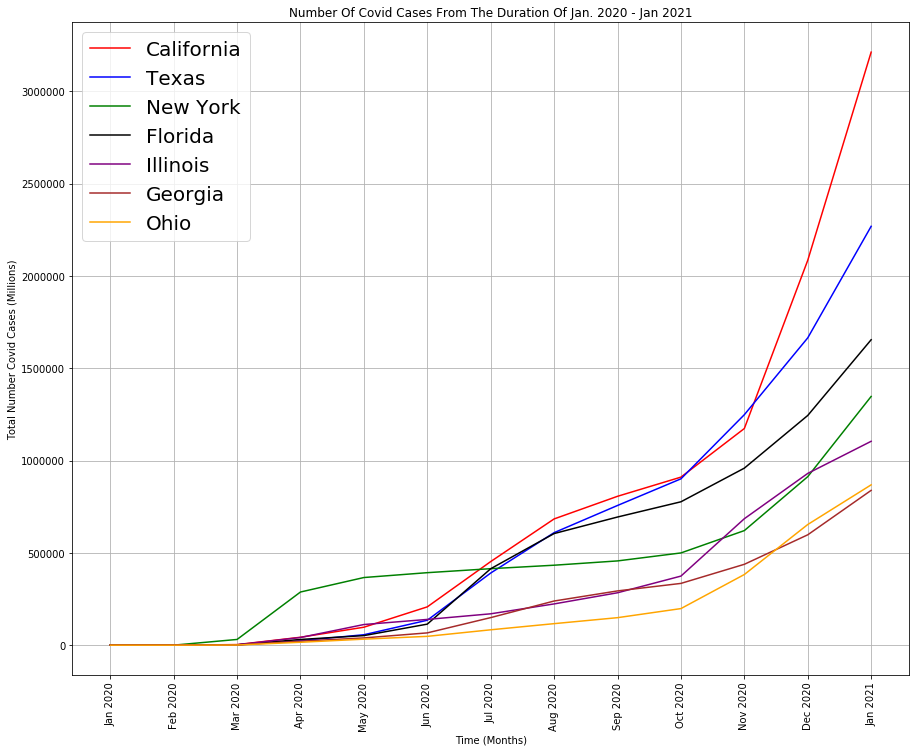

In [22]:
time = np.arange(0,13,1)
# california, = plt.plot(time, statecases, color="red", label="California")
state_names = ['California','Texas','New York','Florida','Illinois','Georgia','Ohio']
colors = ['red','blue','green','black','purple','brown','orange']
months = ['Jan 2020','Feb 2020','Mar 2020','Apr 2020','May 2020','Jun 2020',
               'Jul 2020','Aug 2020','Sep 2020','Oct 2020','Nov 2020','Dec 2020','Jan 2021']

cases_tick_locations = [value for value in time]

plt.figure(figsize=(15, 12))
plt.locator_params(axis="x", nbins=14)

for i in range(0, len(top7state_array)):
    display(plt.plot(time, top7state_array[i], color=colors[i], label=state_names[i]))
    plt.legend(loc = 'best')   

plt.legend(prop={'size': 20})

plt.xticks(cases_tick_locations, months, rotation='vertical')
plt.grid()
plt.title("Number Of Covid Cases From The Duration Of Jan. 2020 - Jan 2021")
plt.xlabel("Time (Months)")
plt.ylabel("Total Number Covid Cases (Millions)") 

# Save Fig
plt.savefig("images/covid_states.png")

# California Bar Graph

In [15]:
x_axis = np.arange(len(cali_array))

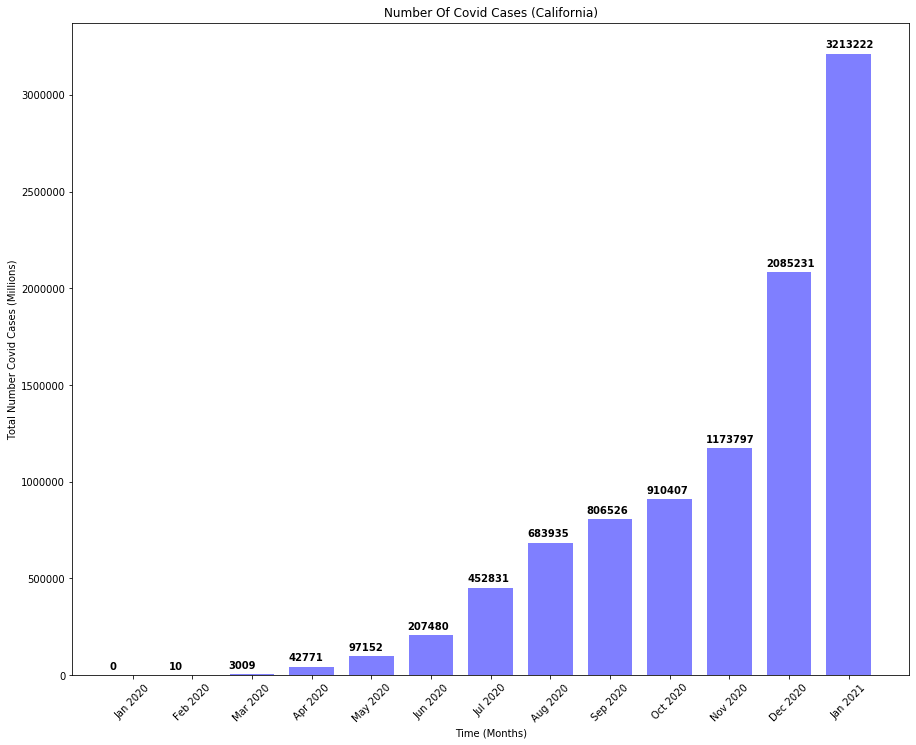

In [23]:
#https://stackoverflow.com/questions/30228069/how-to-display-the-value-of-the-bar-on-each-bar-with-pyplot-barh

fig, ax = plt.subplots()    
ax.bar(x_axis, cali_array, width = 0.75, color="blue", alpha =0.5)
ax.set_xticks(x_axis)
ax.set_xticklabels(months, rotation=45)

plt.title('Number Of Covid Cases (California)')
plt.xlabel('Time (Months)')
plt.ylabel('Total Number Covid Cases (Millions)') 

fig.set_figheight(12)
fig.set_figwidth(15)

# Centering Y-Labels On Graph
for x, y in enumerate(cali_array):
    ax.text(x - .39, y + 30000, str(y), color='black', fontweight='bold')
    
plt.savefig("images/cali_cases.png")

# Unemployment Graphs

In [17]:
unemployment_df = pd.read_csv('Resources/unemployment_covid_top7states.csv')

In [18]:
unemployment_array = []
for i in range(0, len(state_names)):
    state_array = unemployment_df[state_names[i]].to_numpy()
    unemployment_array.append(state_array)

In [19]:
# Checking Array
# unemployment_array

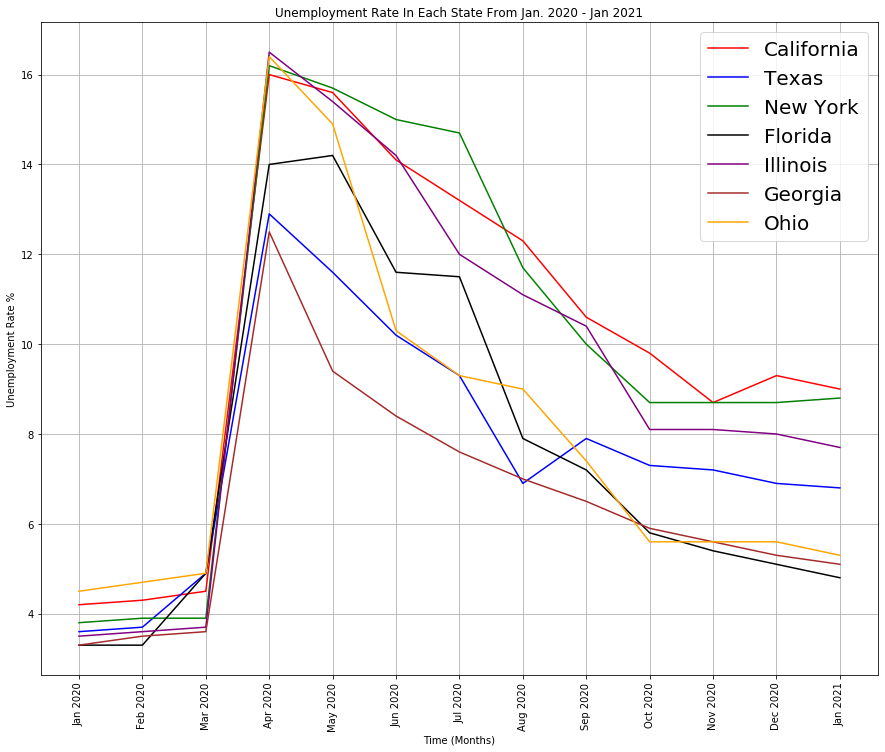

In [24]:
# Creating Line Graph

plt.figure(figsize=(15, 12))

# Showcasing Each Tick On X-Axis
plt.locator_params(axis="x", nbins=14)

for i in range(0, len(top7state_array)):
    display(plt.plot(time, unemployment_array[i], color=colors[i], label=state_names[i]))
    plt.legend(loc = 'best')
    
plt.legend(prop={'size': 20})

plt.xticks(cases_tick_locations, months, rotation='vertical')
plt.grid()

plt.title("Unemployment Rate In Each State From Jan. 2020 - Jan 2021")
plt.xlabel("Time (Months)")
plt.ylabel("Unemployment Rate %") 

plt.savefig("images/unemployment_rates.png")

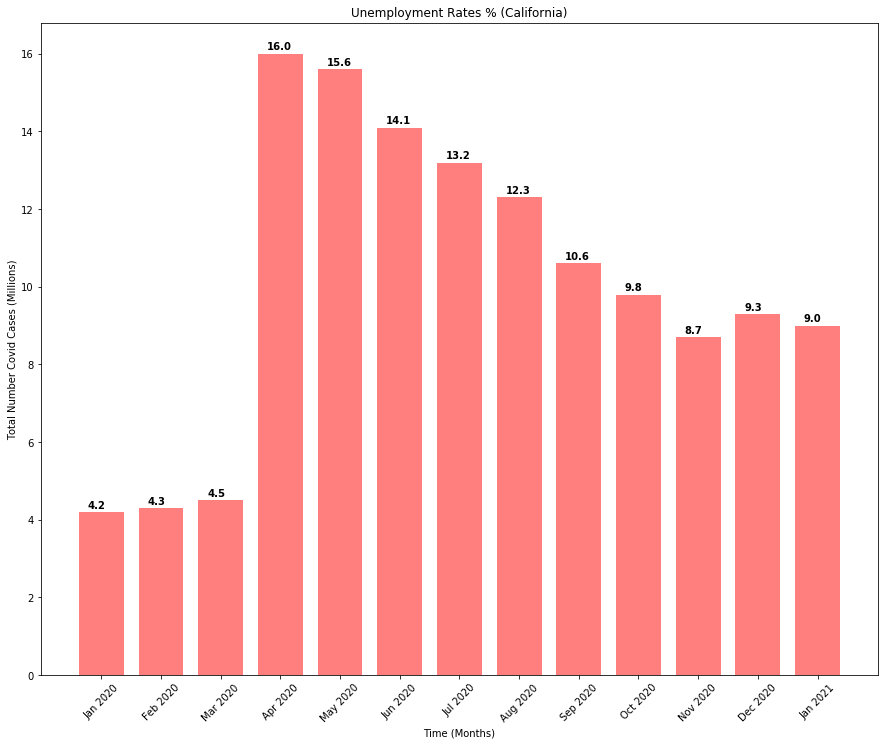

In [25]:
# Creating Bar Graph
# https://stackoverflow.com/questions/30228069/how-to-display-the-value-of-the-bar-on-each-bar-with-pyplot-barh

fig, ax = plt.subplots()    
ax.bar(x_axis, unemployment_array[0], width = 0.75, color="r", alpha =0.5)
ax.set_xticks(x_axis)
ax.set_xticklabels(months, rotation=45)

plt.title('Unemployment Rates % (California)')
plt.xlabel('Time (Months)')
plt.ylabel('Total Number Covid Cases (Millions)') 

fig.set_figheight(12)
fig.set_figwidth(15)

# Centering Y-Labels On Graph
for x, y in enumerate(unemployment_array[0]):
    ax.text(x - .23, y + .1 , str(y), color='black', fontweight='bold')
    
plt.savefig("images/cali_unemployment.png")